In [1]:
train_path = 'data/train.json'
dev_path = 'data/dev.json'

In [45]:
import json

def read_file(path):
    data_X = []
    data_Y = []
    with open(path, 'r') as data_file:
        line = data_file.readline()
        while line:
            data = json.loads(line)
            data_X.append(data['review'])
            data_Y.append(data['ratings'])
            line = data_file.readline()
    return data_X,data_Y

In [3]:
X_train,Y_train = read_file(train_path)
X_dev,Y_dev = read_file(dev_path)

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,confusion_matrix

def get_metrics_from_pred(y_pred,y_true):
    mse = mean_squared_error(y_pred,y_true)
    
    try:
        f1_scor = f1_score(y_true, y_pred, average='weighted')
        acc = accuracy_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true,y_pred)
      
    except:
        y_pred = np.round(y_pred)
        
        f1_scor = f1_score(y_true, y_pred, average='weighted')
        acc = accuracy_score(y_true, y_pred)
        conf_matrix = confusion_matrix(y_true,y_pred)
        
    print("MSE = ",mse," F1 = ",f1_scor," Accuracy = ",acc)
    plt.matshow(conf_matrix)
    plt.colorbar()
    
def get_metrics(model,X,y_true):
    y_pred = model.predict(X)
    get_metrics_from_pred(y_pred,y_true)
    
def get_metrics_using_probs(model,X,y_true):
    y_pred = model.predict_proba(X)
    y_pred = np.average(y_pred,axis=1, weights=[1,2,3,4,5])*15
    get_metrics_from_pred(y_pred,y_true)

In [9]:
import string
from nltk import wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
import re
from nltk.corpus import stopwords

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space

def tokenize(sentence):
    removed_puncts = sentence.translate(translator)
    return wordpunct_tokenize(removed_puncts)

# stemmer = SnowballStemmer("english", ignore_stopwords=True)

# def tokenize(sentence):
#     lowercase = sentence.lower()
#     removed_numbers = re.sub(r'\d+', '', lowercase)
#     removed_puncts = removed_numbers.translate(str.maketrans("","", string.punctuation))
#     removed_whitespacess = removed_puncts.strip()
#     tokens = wordpunct_tokenize(removed_puncts)
#     for i in range(len(tokens)):
#         tokens[i] = stemmer.stem(tokens[i])
#     return tokens

processed_stopwords = tokenize(' '.join(stopwords.words('english')))

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(strip_accents='ascii',
                             lowercase=True,
                             tokenizer=tokenize,
                             stop_words=processed_stopwords,
                             ngram_range=(1,1),
                             binary=True,
                             norm='l2',
                             analyzer='word')

X_train_counts = vectorizer.fit_transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)

* Try Removeding whole numbers
* Try seperating number and text
* Try replacing 000ps by ooops
* Try removing repeated characters like sssslllleeeepppp.

# Baseline

/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


MSE =  3.771725  F1 =  0.2686300573016148  Accuracy =  0.43975


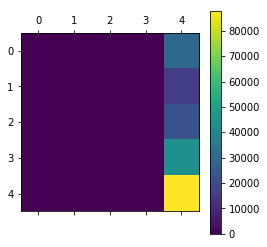

In [12]:
import numpy as np

all_5 = list(5*np.ones([len(Y_dev),]))

get_metrics_from_pred(all_5,Y_dev)

# Trying Multinomial Naive Bayes

In [11]:
# from sklearn.naive_bayes import MultinomialNB

# model_MNNB = MultinomialNB()
# model_MNNB.fit(X_train_counts,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MSE =  1.87538  F1 =  0.4630410368251793  Accuracy =  0.5572


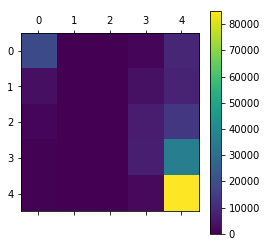

In [12]:
# get_metrics(model_MNNB,X_dev_counts,Y_dev)

# Trying Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(verbose=1,n_jobs=7)
model.fit(X_train_counts,Y_train)

/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=7,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=1, warm_start=False)

MSE =  0.705515  F1 =  0.6547875955316029  Accuracy =  0.675845
MSE =  0.4949026211930505  F1 =  0.6194519450893323  Accuracy =  0.60378


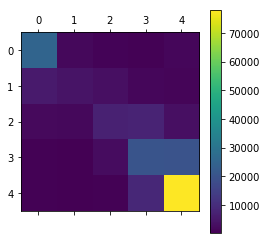

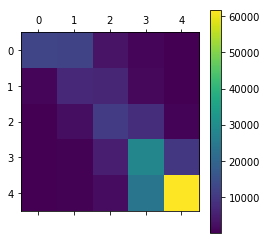

In [57]:
get_metrics(model,X_dev_counts,Y_dev)
get_metrics_using_probs(model,X_dev_counts,Y_dev)

# Logistic Detailed

In [40]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(verbose=1,n_jobs=7,class_weight='balanced',multi_class='ovr',solver='liblinear')
# model.fit(X_train_counts,Y_train)

/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=7, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

MSE =  0.663425  F1 =  0.6682855545291063  Accuracy =  0.67089
MSE =  0.5470195674195963  F1 =  0.5743339042150869  Accuracy =  0.55102


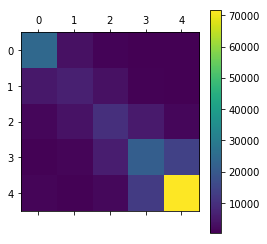

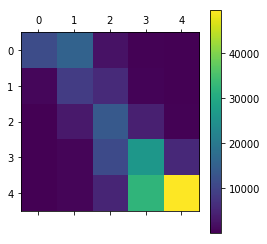

In [47]:
# get_metrics(model,X_dev_counts,Y_dev)
# get_metrics_using_probs(model,X_dev_counts,Y_dev)

In [52]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(verbose=1,n_jobs=7,class_weight='balanced',multi_class='multinomial',solver='lbfgs')
# model.fit(X_train_counts,Y_train)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:  2.3min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=7, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
          warm_start=False)

MSE =  0.674505  F1 =  0.6606340320373303  Accuracy =  0.6507
MSE =  0.5600854819812404  F1 =  0.5993693503803343  Accuracy =  0.575025


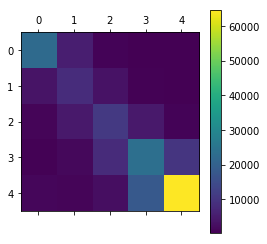

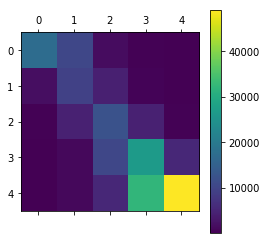

In [53]:
# get_metrics(model,X_dev_counts,Y_dev)
# get_metrics_using_probs(model,X_dev_counts,Y_dev)

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(verbose=1,n_jobs=7,class_weight='balanced',multi_class='ovr',solver='liblinear',penalty='l1')
model.fit(X_train_counts,Y_train)

/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=7, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

MSE =  0.665345  F1 =  0.6684602753237181  Accuracy =  0.67084
MSE =  0.545941237873659  F1 =  0.5787589033330414  Accuracy =  0.555205


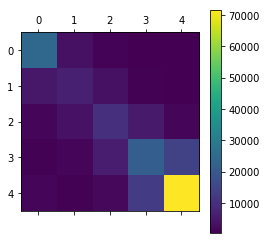

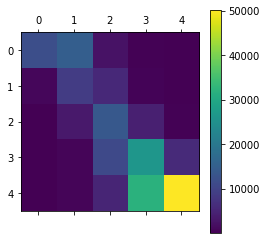

In [55]:
get_metrics(model,X_dev_counts,Y_dev)
get_metrics_using_probs(model,X_dev_counts,Y_dev)

In [62]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(verbose=1,n_jobs=7,class_weight='balanced',multi_class='multinomial',solver='saga',penalty='l1')
model.fit(X_train_counts,Y_train)

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


max_iter reached after 16301 seconds


/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed: 271.7min finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=7, penalty='l1',
          random_state=None, solver='saga', tol=0.0001, verbose=1,
          warm_start=False)

MSE =  0.6928  F1 =  0.6554059749480826  Accuracy =  0.646515
MSE =  0.5424154743519443  F1 =  0.6142127594708119  Accuracy =  0.591525


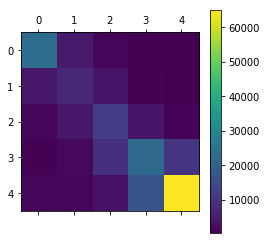

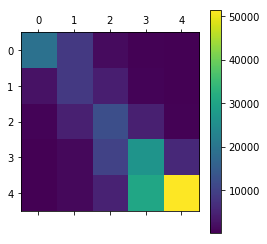

In [63]:
get_metrics(model,X_dev_counts,Y_dev)
get_metrics_using_probs(model,X_dev_counts,Y_dev)

# Linear Regression

In [48]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression(n_jobs=7)
# model.fit(X_train_counts,Y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-f58780eaed08>", line 4, in <module>
    model.fit(X_train_counts,Y_train)
  File "/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/base.py", line 473, in fit
    out = sparse_lsqr(X, y)
  File "/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/scipy/sparse/linalg/isolve/lsqr.py", line 423, in lsqr
    v = A.rmatvec(u) - beta * v
  File "/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/scipy/sparse/linalg/interface.py", line 269, in rmatvec
    y = self._rmatvec(x)
  File "/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/scipy/sparse/linalg/interface.py", line 291, in _rmatvec
  

KeyboardInterrupt: 

In [ ]:
# get_metrics(model,X_dev_counts,Y_dev)

# SGD Classifier

In [15]:
# from sklearn.linear_model import SGDClassifier

# model_SGD = SGDClassifier(n_jobs=7,verbose=True)
# model_SGD.fit(X_train_counts,Y_train)

/home/ankurshaswat/MyFiles/Repos/COL772/A1_part_1/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


-- Epoch 1
-- Epoch 1-- Epoch 1
-- Epoch 1

-- Epoch 1
Norm: 1.58, NNZs: 120069, Bias: -1.012438, T: 1000000, Avg. loss: 0.165990
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 23.53, NNZs: 167109, Bias: -0.841688, T: 1000000, Avg. loss: 0.183549
Total training time: 0.73 seconds.
-- Epoch 2
Norm: 2.28, NNZs: 149980, Bias: -1.010804, T: 1000000, Avg. loss: 0.225623
Total training time: 0.79 seconds.
-- Epoch 2
Norm: 3.16, NNZs: 230699, Bias: -1.014423, T: 1000000, Avg. loss: 0.447601
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 30.41, NNZs: 275961, Bias: -0.283493, T: 1000000, Avg. loss: 0.437694
Total training time: 0.76 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 142643, Bias: -1.005372, T: 2000000, Avg. loss: 0.162985
Total training time: 1.39 seconds.
-- Epoch 3
Norm: 23.46, NNZs: 171884, Bias: -0.841919, T: 2000000, Avg. loss: 0.181608
Total training time: 1.47 seconds.
-- Epoch 3
Norm: 1.96, NNZs: 176061, Bias: -1.005114, T: 2000000, Avg. loss: 0.221582
Total training time:

[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:    3.8s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=7, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=True, warm_start=False)

MSE =  1.029835  F1 =  0.5517534759106447  Accuracy =  0.62264


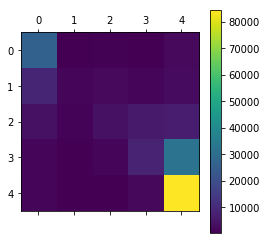

In [16]:
# get_metrics(model_SGD,X_dev_counts,Y_dev)

# ElasticNet

In [49]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train_counts,Y_train)

KeyboardInterrupt: 

In [ ]:
get_metrics(model,X_dev_counts,Y_dev)

# GradientBoostingClassifier

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

# model = GradientBoostingClassifier(verbose=True)
# model.fit(X_train_counts,Y_train)

      Iter       Train Loss   Remaining Time 
         1     1485803.5110          238.55m
         2     1446325.6075          232.57m
         3     1414118.7574          229.73m
         4     1387474.9866          229.58m
         5     1364682.5540          232.52m
         6     1344253.4853          230.56m
         7     1326927.1060          229.86m
         8     1311504.7733          228.17m


In [ ]:
# get_metrics(model,X_dev_counts,Y_dev)